In [667]:
#import neccessary labraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
from scipy import stats

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [668]:
# import Data  
# Data taken from kaggle.com for only practice 
df_usedcar = pd.read_excel("Data/Data.xlsx") 
print(df_usedcar.info())

df_usedcar.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6017 non-null object
Engine               5983 non-null object
Power                5983 non-null object
Seats                5977 non-null float64
New_Price            824 non-null object
Price                6019 non-null float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB
None


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [669]:
df_usedcar

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


In [656]:
#check null values on dataset

df_usedcar.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [657]:
#drop New_Price feature
df_usedcar.drop('New_Price',axis =1,inplace =True)

In [658]:
# split data and take only integer string 

df_usedcar['Name']= [item[0] for item in df_usedcar['Name'].astype(str).map(lambda x : x.split())]
df_usedcar['Mileage'] = [ item[0] for item in df_usedcar['Mileage'].astype(str).map(lambda x : x.split())]
df_usedcar['Engine'] = [ item[0] for item in df_usedcar['Engine'].astype(str).map(lambda x : x.split())]
df_usedcar['Power'] =[ item[0] for item in df_usedcar['Power'].astype(str).map(lambda x : x.split())]

In [659]:
#df_usedcar.dropna(inplace = True)
df_usedcar['Mileage'] = df_usedcar['Mileage'].astype(float)
df_usedcar['Engine'] = df_usedcar['Engine'].astype(float)

In [660]:
# remove null string from power feature 
df_usedcar= df_usedcar[~ (df_usedcar.Power == 'null')]
df_usedcar['Power'] = df_usedcar['Power'].astype(float)

In [661]:
df_usedcar.dropna(inplace = True )

In [662]:
df_usedcar.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [663]:
#checking correlation between features
df_usedcar.corr()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
Year,1.000000,-0.169369,0.285623,-0.068045,0.014531,0.007833,0.299475
Kilometers_Driven,-0.169369,1.000000,-0.060608,0.093030,0.033490,0.083072,-0.008249
Mileage,0.285623,-0.060608,1.000000,-0.637258,-0.538844,-0.331576,-0.341652
Engine,-0.068045,0.093030,-0.637258,1.000000,0.866301,0.401116,0.658047
Power,0.014531,0.033490,-0.538844,0.866301,1.000000,0.101460,0.772843
Seats,0.007833,0.083072,-0.331576,0.401116,0.101460,1.000000,0.055547
Price,0.299475,-0.008249,-0.341652,0.658047,0.772843,0.055547,1.000000


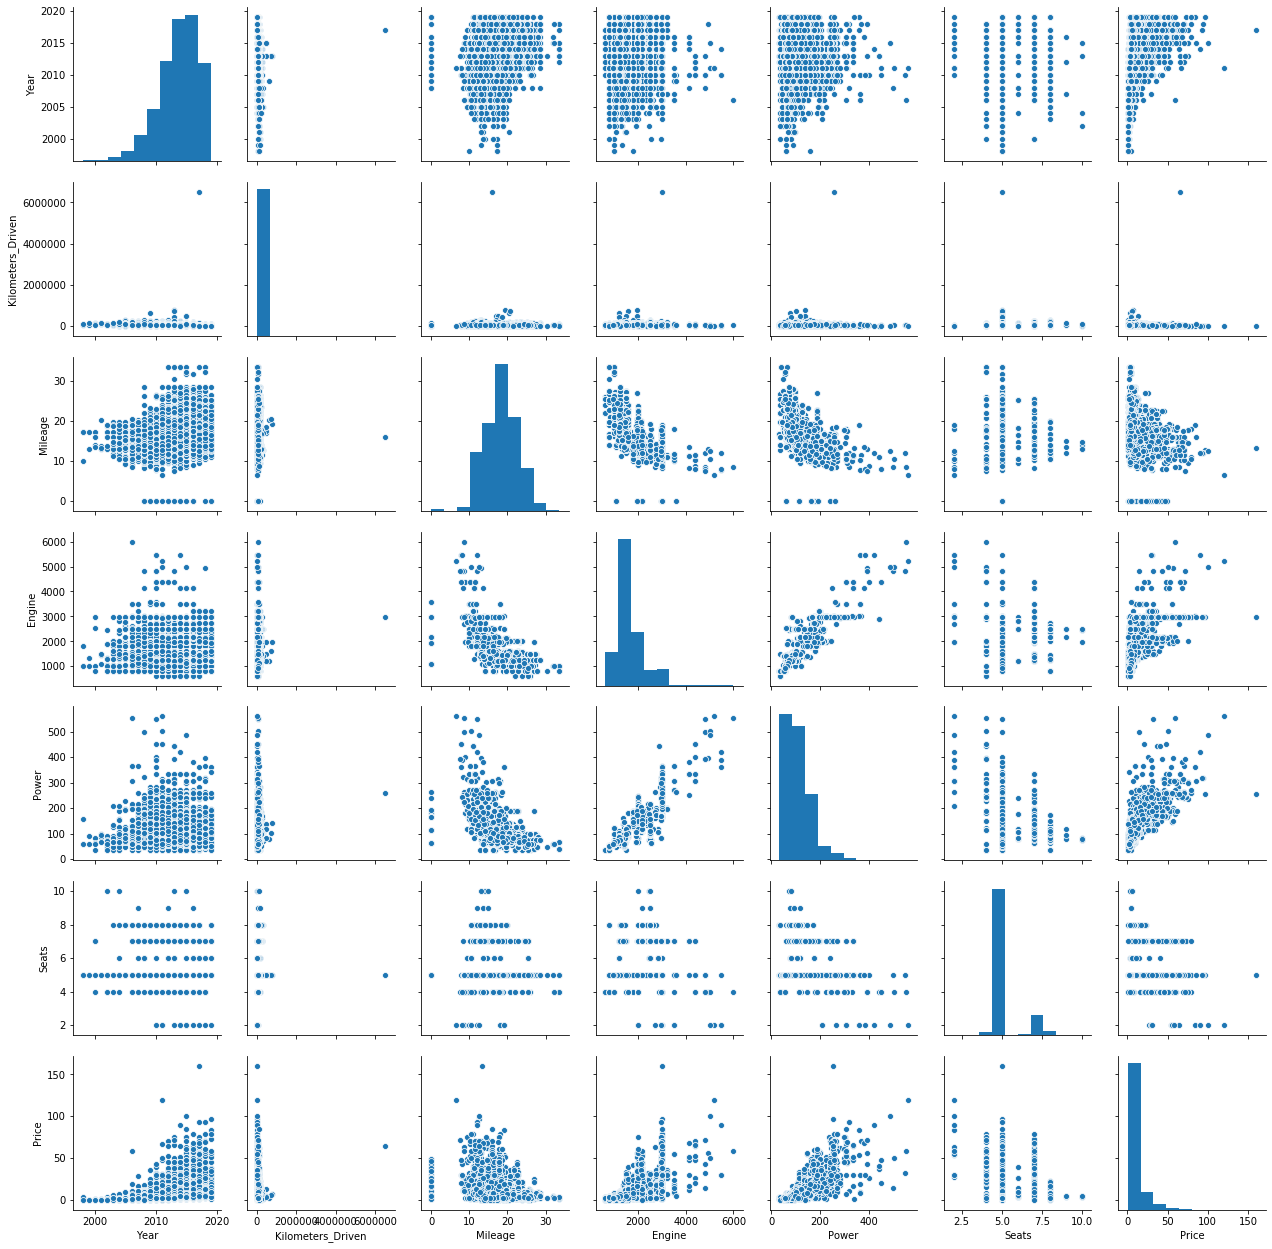

In [664]:
sns_plot = sns.pairplot(df_usedcar)
sns_plot.savefig("feature_corr.jpeg")

In [665]:
# after analysis pairplot power feature looks like high correlation with engine feature.
# I decided droping power feature among these two features.
df_usedcar.drop(['Power','Location'] ,axis =1 , inplace = True )

In [356]:
# Even analysis pairplot , there are showing none of feature are normal distribution .
# I am trying to transform normal distribution by np.log() and stats.boxcox
df_usedcar['Year_box']= stats.boxcox(df_usedcar['Year'])[0]
df_usedcar['Price_log'] = np.log(df_usedcar['Price'])
df_usedcar['Engine_log'] = np.log(df_usedcar['Engine'])
df_usedcar['Seats_log'] = stats.boxcox(df_usedcar['Seats'])[0]
df_usedcar['Kilometers_Driven_box']= stats.boxcox(df_usedcar['Kilometers_Driven'])[0]

In [357]:
df_usedcar.head()

,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Seats,Price,Year_box,Price_log,Engine_log,Seats_log,Kilometers_Driven_box
0,Maruti,2010,72000,CNG,Manual,First,26.60,998.0,5.0,1.75,2.243514e+153,0.559616,6.905753,1.094541,70.682220
1,Hyundai,2015,41000,Diesel,Manual,First,19.67,1582.0,5.0,12.50,2.520967e+153,2.525729,7.366445,1.094541,60.279131
2,Honda,2011,46000,Petrol,Manual,First,18.20,1199.0,5.0,4.50,2.296501e+153,1.504077,7.089243,1.094541,62.279605
3,Maruti,2012,87000,Diesel,Manual,First,20.77,1248.0,7.0,6.00,2.350711e+153,1.791759,7.129298,1.229548,74.545180
4,Audi,2013,40670,Diesel,Automatic,Second,15.20,1968.0,5.0,17.74,2.406173e+153,2.875822,7.584773,1.094541,60.140937


In [358]:
# after transform normal distribution i droped unused features.
df_usedcar_prep = df_usedcar.drop(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Seats', 'Price'],axis =1)

In [359]:
df_usedcar_prep.head()

,Name,Fuel_Type,Transmission,Owner_Type,Year_box,Price_log,Engine_log,Seats_log,Kilometers_Driven_box
0,Maruti,CNG,Manual,First,2.243514e+153,0.559616,6.905753,1.094541,70.682220
1,Hyundai,Diesel,Manual,First,2.520967e+153,2.525729,7.366445,1.094541,60.279131
2,Honda,Petrol,Manual,First,2.296501e+153,1.504077,7.089243,1.094541,62.279605
3,Maruti,Diesel,Manual,First,2.350711e+153,1.791759,7.129298,1.229548,74.545180
4,Audi,Diesel,Automatic,Second,2.406173e+153,2.875822,7.584773,1.094541,60.140937


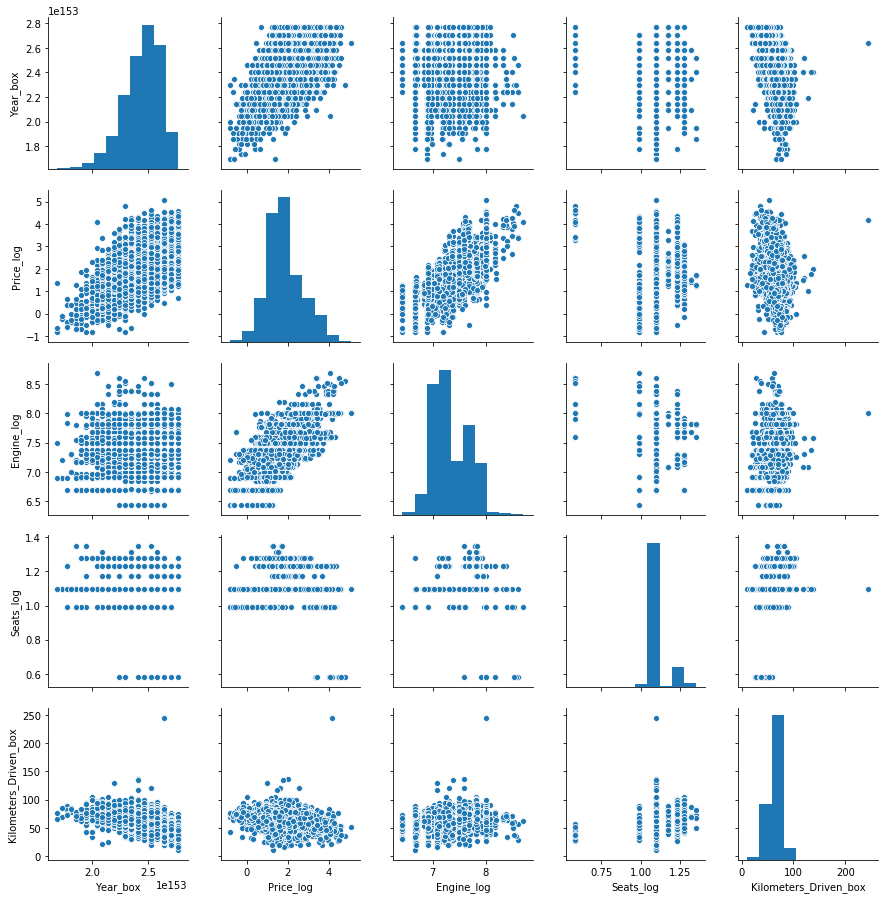

In [360]:
sns.pairplot(df_usedcar_prep)

## split train and test data 

In [361]:
# after prepare data , i split data into train and test data .
from sklearn.model_selection import train_test_split

X = df_usedcar_prep.drop('Price_log',axis =1)
y =df_usedcar_prep['Price_log']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .25 ,random_state =42)

## Dividing numeric and object 

In [362]:
# dividing numeric and object data 
X_train_num=X_train.select_dtypes(exclude='object')
X_train_obj = X_train.select_dtypes(include='object')

In [363]:
X_train_num.head()

,Year_box,Engine_log,Seats_log,Kilometers_Driven_box
5320,2.580356e+153,7.089243,1.094541,36.941508
1099,2.350711e+153,7.087574,1.094541,63.768139
2160,2.641115e+153,7.311218,1.094541,46.850930
2990,2.703272e+153,7.129298,1.229548,44.291386
5162,2.350711e+153,7.286876,1.094541,86.820642


In [364]:
# scalling numeric train data 
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
columns_name = X_train_num.columns
X_train_num = pd.DataFrame(ss.fit_transform(X_train_num))
X_train_num.set_index(X_train.index,inplace = True )
X_train_num.columns = columns_name
X_train_num

,Year_box,Engine_log,Seats_log,Kilometers_Driven_box
5320,0.812962,-0.733052,-0.291815,-2.239231
1099,-0.501675,-0.737981,-0.291815,0.001894
2160,1.160781,-0.077596,-0.291815,-1.411387
2990,1.516612,-0.614778,1.995961,-1.625215
5162,-0.501675,-0.149474,-0.291815,1.927724
...,...,...,...,...
3873,0.472977,-1.274866,-0.291815,0.225293
5324,0.472977,-0.765242,-0.291815,0.264069
5359,1.160781,-0.765242,-0.291815,0.031837
5526,1.160781,-0.075624,-0.291815,-0.718168


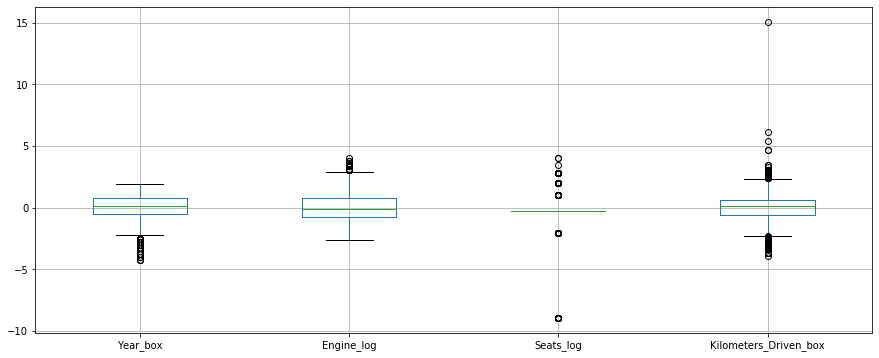

In [365]:
X_train_num.boxplot(figsize=(15,6))

In [366]:
# remove outlier
X_train_num= X_train_num[(np.abs(stats.zscore(X_train_num)) < 2.5).all(axis =1)]

In [367]:
no_outlier = X_train.shape[0]-X_train_num.shape[0]
no_outlier

294

In [368]:
X_train_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4110 entries, 5320 to 887
Data columns (total 4 columns):
Year_box                 4110 non-null float64
Engine_log               4110 non-null float64
Seats_log                4110 non-null float64
Kilometers_Driven_box    4110 non-null float64
dtypes: float64(4)
memory usage: 160.5 KB


## Category Data 

In [369]:
X_train_obj

,Name,Fuel_Type,Transmission,Owner_Type
5320,Volkswagen,Petrol,Manual,First
1099,Hyundai,Petrol,Manual,First
2160,Honda,Petrol,Automatic,First
2990,Maruti,Diesel,Manual,First
5162,Nissan,Diesel,Manual,First
...,...,...,...,...
3873,Maruti,Petrol,Manual,First
5324,Hyundai,Diesel,Manual,First
5359,Hyundai,Diesel,Manual,First
5526,Ford,Diesel,Manual,First


In [370]:
X_train_obj_dum = pd.get_dummies(X_train_obj,drop_first= True)

In [371]:
#df_owner = X_train_obj.merge(pd.get_dummies(X_train_obj['Owner_Type'],drop_first= True),left_index=True,right_index=True)
#columns = df_owner.columns

#df_owner.columns = ['Name', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Fourth_Above', 'Second', 'Third']
#df_owner

In [372]:
#df_transmission = df_owner.merge(pd.get_dummies(X_train_obj['Transmission'],drop_first= True),left_index=True, right_index=True)
#df_transmission

In [373]:
#df_fuelType = df_transmission.merge(pd.get_dummies(X_train_obj['Fuel_Type'],drop_first= True),left_index=True,right_index=True)
#df_fuelType

In [374]:
#df_name = df_fuelType.merge(pd.get_dummies(X_train_obj['Name'],drop_first= True),left_index=True,right_index=True)
#df_name

In [375]:
#df_name.drop(['Name','Fuel_Type','Transmission','Owner_Type'],axis =1 ,inplace =True)

In [520]:
X_train_obj_dum.head()

,Name_Volvo,Name_Tata,Name_Jaguar,Name_Jeep,Name_Volkswagen,Name_Mitsubishi,Name_Ford,Name_Porsche,Name_Renault,Fuel_Type_Petrol,...,Transmission_Manual,Name_Honda,Name_Nissan,Name_Mahindra,Fuel_Type_Diesel,Name_Chevrolet,Owner_Type_Second,Name_Mini,Name_Datsun,Name_Maruti
5320,0,0,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
1099,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2160,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2990,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
5162,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,0


In [521]:
#train_test_columns

In [522]:
# making same dummies columns name between train data and test data 

X_train_obj_dum = X_train_obj_dum[train_test_columns]

In [523]:
print(X_train_obj_dum.shape,X_train_num.shape)

(4404, 29) (4110, 4)


In [524]:
X_train_num.head()

,Year_box,Engine_log,Seats_log,Kilometers_Driven_box
5320,0.812962,-0.733052,-0.291815,-2.239231
1099,-0.501675,-0.737981,-0.291815,0.001894
2160,1.160781,-0.077596,-0.291815,-1.411387
2990,1.516612,-0.614778,1.995961,-1.625215
5162,-0.501675,-0.149474,-0.291815,1.927724


In [625]:
X_train_prepare = pd.merge(X_train_num,X_train_obj_dum,left_index =True ,right_index = True)
X_train_prepare.shape

(4110, 33)

In [627]:
X_train_prepare.head()

,Year_box,Engine_log,Seats_log,Kilometers_Driven_box,Name_Volvo,Name_Tata,Name_Jaguar,Name_Jeep,Name_Volkswagen,Name_Mitsubishi,...,Transmission_Manual,Name_Honda,Name_Nissan,Name_Mahindra,Fuel_Type_Diesel,Name_Chevrolet,Owner_Type_Second,Name_Mini,Name_Datsun,Name_Maruti
5320,0.812962,-0.733052,-0.291815,-2.239231,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1099,-0.501675,-0.737981,-0.291815,0.001894,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2160,1.160781,-0.077596,-0.291815,-1.411387,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2990,1.516612,-0.614778,1.995961,-1.625215,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
5162,-0.501675,-0.149474,-0.291815,1.927724,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,0


## geting y_train data 

In [628]:
y_train

5320    1.816452
1099    1.386294
2160    2.451005
2990    2.224624
5162    1.252763
          ...   
3873    1.458615
5324    1.446919
5359    1.435085
5526    2.169054
887     2.277267
Name: Price_log, Length: 4110, dtype: float64

In [629]:
y_train = y_train.loc[X_train_prepare.index]
y_train

5320    1.816452
1099    1.386294
2160    2.451005
2990    2.224624
5162    1.252763
          ...   
3873    1.458615
5324    1.446919
5359    1.435085
5526    2.169054
887     2.277267
Name: Price_log, Length: 4110, dtype: float64

In [630]:
print(X_train_prepare.shape,'\n',y_train.shape)

(4110, 33) 
 (4110,)


## Testing R2 

In [631]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_prepare,y_train)
train_r2 = lr.score(X_train_prepare,y_train)
train_r2

0.9093859693723363

In [632]:
from sklearn.metrics import r2_score , mean_absolute_error

y_hat_train = lr.predict(X_train_prepare)


print(f"r^2 :{r2_score(y_train,y_hat_train)} " )
print(f" rmse :{np.sqrt(mean_absolute_error(y_train,y_hat_train))}")

r^2 :0.9093859693723363 
 rmse :0.44138036475756615


In [633]:
# display intercet
lr.intercept_

2.468038064645037

In [634]:
df_coef = pd.DataFrame(lr.coef_)
df_coef.set_index(X_train_prepare.columns,inplace = True)
print(X_train_prepare.shape)
df_coef

(4110, 33)


,0
Year_box,0.388039
Engine_log,0.413499
Seats_log,0.045043
Kilometers_Driven_box,-0.034072
Name_Volvo,-0.121084
Name_Tata,-1.276871
Name_Jaguar,0.158299
Name_Jeep,-0.429352
Name_Volkswagen,-0.782005
Name_Mitsubishi,-0.661540


##  statsmodels Test 

In [585]:
X_train_prepare

,Year_box,Engine_log,Seats_log,Kilometers_Driven_box,Name_Volvo,Name_Tata,Name_Jaguar,Name_Jeep,Name_Volkswagen,Name_Mitsubishi,...,Name_Nissan,Name_Mahindra,Fuel_Type_Diesel,Name_Chevrolet,Owner_Type_Second,Name_Mini,Name_Datsun,Name_Maruti,int,sq
5320,0.812962,-0.733052,-0.291815,-2.239231,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1099,-0.501675,-0.737981,-0.291815,0.001894,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2160,1.160781,-0.077596,-0.291815,-1.411387,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2990,1.516612,-0.614778,1.995961,-1.625215,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
5162,-0.501675,-0.149474,-0.291815,1.927724,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3873,0.472977,-1.274866,-0.291815,0.225293,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5324,0.472977,-0.765242,-0.291815,0.264069,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5359,1.160781,-0.765242,-0.291815,0.031837,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5526,1.160781,-0.075624,-0.291815,-0.718168,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [586]:
X_train_prepare.shape

(4110, 35)

In [587]:
X_train_prepare.rename(columns={'Name_Mercedes-Benz':'Name_Mercedes_Benz','Owner_Type_Fourth & Above':'Owner_Type_Fourth_Above'},
                       inplace=True)

In [588]:
# from statsmodels

import statsmodels.formula.api as smf

feature_formula = "+".join(X_train_prepare.columns)
sm_formula = "Price_log ~" + feature_formula
sm_formula

'Price_log ~Year_box+Engine_log+Seats_log+Kilometers_Driven_box+Name_Volvo+Name_Tata+Name_Jaguar+Name_Jeep+Name_Volkswagen+Name_Mitsubishi+Name_Ford+Name_Porsche+Name_Renault+Fuel_Type_Petrol+Name_Mercedes_Benz+Name_Toyota+Fuel_Type_LPG+Name_BMW+Name_Land+Name_Hyundai+Owner_Type_Third+Name_Skoda+Name_Fiat+Transmission_Manual+Name_Honda+Name_Nissan+Name_Mahindra+Fuel_Type_Diesel+Name_Chevrolet+Owner_Type_Second+Name_Mini+Name_Datsun+Name_Maruti+int+sq'

In [589]:
train_data = pd.merge(X_train_prepare,y_train,left_index=True,right_index=True)
res = smf.ols(sm_formula,data=train_data).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Price_log   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     1240.
Date:                Tue, 07 Jan 2020   Prob (F-statistic):               0.00
Time:                        16:59:18   Log-Likelihood:                -157.94
No. Observations:                4110   AIC:                             383.9
Df Residuals:                    4076   BIC:                             598.8
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.4680      0.046     53.366      0.000       2.377       2.559
Year_box                  0.3880      0.006     67.983      0.000       0.377       0.399
Engine_log                0.4135      0.008     49.224      0.000       0.397       0.430
Seats_log                 0.0450      0.007      6.026      0.000       0.030       0.060
Kilometers_Driven_box    -0.0341      0.006     -5.665      0.000      -0.046      -0.022
Name_Volvo               -0.1211      0.066     -1.835      0.067      -0.250       0.008
Name_Tata                -1.2769      0.035    -36.903      0.000      -1.345      -1.209
Name_Jaguar               0.1583      0.053      2.966      0.003       0.054       0.263
Name_Jeep                -0.4294      0.074     -5.802      0.000      -0.574      -0.284
Name_Volkswagen          -0.7820      0.028    -27.719      0.000      -0.837      -0.727
Name_Mitsubishi          -0.6615      0.069     -9.542      0.000      -0.797      -0.526
Name_Ford                -0.8622      0.028    -30.450      0.000      -0.918      -0.807
Name_Porsche              0.5317      0.088      6.063      0.000       0.360       0.704
Name_Renault             -0.7100      0.034    -20.842      0.000      -0.777      -0.643
Fuel_Type_Petrol          0.0892      0.042      2.147      0.032       0.008       0.171
Name_Mercedes_Benz       -0.0099      0.026     -0.386      0.699      -0.060       0.040
Name_Toyota              -0.6692      0.028    -23.534      0.000      -0.725      -0.613
Fuel_Type_LPG             0.1537      0.104      1.479      0.139      -0.050       0.358
Name_BMW                  0.0102      0.027      0.382      0.702      -0.042       0.062
Name_Land                 0.1731      0.043      4.058      0.000       0.089       0.257
Name_Hyundai             -0.7101      0.026    -27.795      0.000      -0.760      -0.660
Owner_Type_Third         -0.1738      0.035     -5.021      0.000      -0.242      -0.106
Name_Skoda               -0.6911      0.031    -22.647      0.000      -0.751      -0.631
Name_Fiat                -0.8712      0.064    -13.526      0.000      -0.997      -0.745
Transmission_Manual      -0.1609      0.013    -12.454      0.000      -0.186      -0.136
Name_Honda               -0.7573      0.026    -28.967      0.000      -0.809      -0.706
Name_Nissan              -0.8674      0.039    -22.244      0.000      -0.944      -0.791
Name_Mahindra            -0.9819      0.032    -30.259      0.000      -1.046      -0.918
Fuel_Type_Diesel          0.1970      0.042      4.716      0.000       0.115       0.279
Name_Chevrolet           -1.0115      0.036    -27.714      0.000      -1.083      -0.940
Owner_Type_Second        -0.0509      0.011     -4.444      0.000      -0.073      -0.028
Name_Mini              

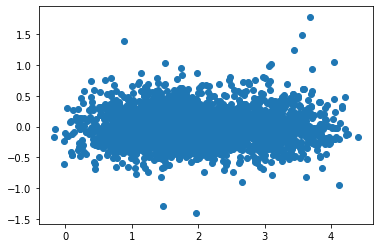

In [590]:
#check assumption

residuals = y_hat_train - y_train

plt.scatter(y_hat_train,residuals)

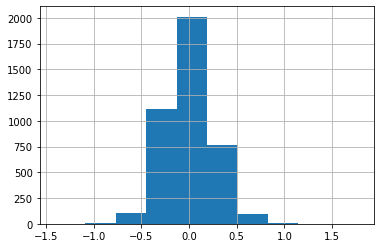

In [591]:
residuals.hist()

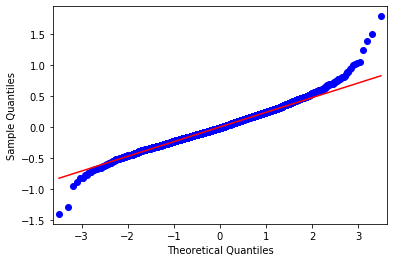

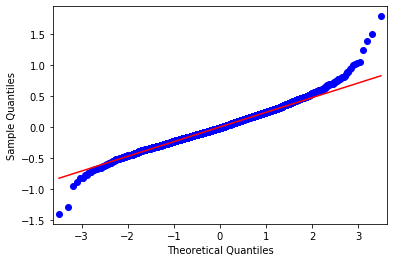

In [592]:
from statsmodels.graphics.gofplots import qqplot

qqplot(residuals,line ='q')

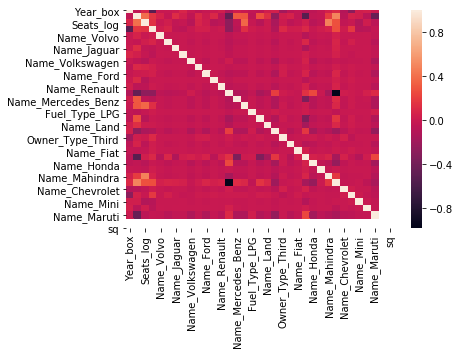

In [593]:
sns.heatmap(X_train_prepare.corr())

# feature engineering 

In [594]:
X_train_prepare.head()

,Year_box,Engine_log,Seats_log,Kilometers_Driven_box,Name_Volvo,Name_Tata,Name_Jaguar,Name_Jeep,Name_Volkswagen,Name_Mitsubishi,...,Name_Nissan,Name_Mahindra,Fuel_Type_Diesel,Name_Chevrolet,Owner_Type_Second,Name_Mini,Name_Datsun,Name_Maruti,int,sq
5320,0.812962,-0.733052,-0.291815,-2.239231,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1099,-0.501675,-0.737981,-0.291815,0.001894,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2160,1.160781,-0.077596,-0.291815,-1.411387,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2990,1.516612,-0.614778,1.995961,-1.625215,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
5162,-0.501675,-0.149474,-0.291815,1.927724,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0


In [637]:
from itertools import combinations

lm = LinearRegression()

column_list = X_train_prepare.columns
interactions = list(combinations(column_list,2))
interactions_dict = {}

for interaction in interactions:
    X_train_int = X_train_prepare
    X_train_int['int'] = X_train_prepare[interaction[0]] * X_train_prepare[interaction[1]]
    lm.fit(X_train_int,y_train)
    interactions_dict[lm.score(X_train_int,y_train)] = interaction
    
top_five = sorted(interactions_dict.keys(),reverse= True)[:5]
low_five =top_five = sorted(interactions_dict.keys(),reverse= True)[-5:]
print(top_five)
#low_five
    

[0.9093859856283177, 0.9093859737574653, 0.9093859708080899, 0.9093859695231263, 0.9093859693723363]


In [596]:
#polinomial 
from sklearn.preprocessing import PolynomialFeatures

poly_dict = {}

for feature in X_train_int.columns:
    for p in range(2,5):
        X_train_poly = X_train_int
        X_train_poly['sq'] = X_train_int[feature]**p
        lm = LinearRegression()
        lm.fit(X_train_poly,y_train)
        poly_dict[lr.score(X_train_poly,y_train)] = [feature,p]
     
top_five = sorted(poly_dict.keys(),reverse=True)[:5]
top_five

[0.9093859693723363]

In [597]:
# make ready model for test data 

#lr.fit(X_train_prepare,y_train)
#lr.score(X_train_prepare,y_train)

## Validate  with test Data 

In [598]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 4204 to 2533
Data columns (total 8 columns):
Name                     1456 non-null object
Fuel_Type                1456 non-null object
Transmission             1456 non-null object
Owner_Type               1456 non-null object
Year_box                 1456 non-null float64
Engine_log               1456 non-null float64
Seats_log                1456 non-null float64
Kilometers_Driven_box    1456 non-null float64
dtypes: float64(4), object(4)
memory usage: 102.4+ KB


In [599]:
X_test.drop_duplicates(inplace = True )

In [600]:
X_test.dropna(inplace = True )

In [601]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 4204 to 2533
Data columns (total 8 columns):
Name                     1456 non-null object
Fuel_Type                1456 non-null object
Transmission             1456 non-null object
Owner_Type               1456 non-null object
Year_box                 1456 non-null float64
Engine_log               1456 non-null float64
Seats_log                1456 non-null float64
Kilometers_Driven_box    1456 non-null float64
dtypes: float64(4), object(4)
memory usage: 102.4+ KB


In [602]:
X_test_num = X_test.select_dtypes(exclude='object')
X_num_columns = X_test_num.columns
X_test_num = pd.DataFrame(ss.fit_transform(X_test_num))
X_test_num.columns = X_num_columns
X_test_num.set_index(X_test.index,inplace = True)

In [603]:
X_test_num.head()

,Year_box,Engine_log,Seats_log,Kilometers_Driven_box
4204,-1.135224,2.025854,-0.319815,0.256855
605,0.442923,1.080362,2.083376,0.632594
205,0.442923,0.776980,-0.319815,0.417451
456,1.479875,-0.579776,-0.319815,-1.701723
1303,-0.525490,0.817570,-0.319815,-0.149920


In [604]:
#(np.abs(stats.zscore(X_test_num)) < 2.5).all(axis =1)

In [605]:
X_test_num = X_test_num[(np.abs(stats.zscore(X_test_num)) < 2.5).all(axis =1)]

In [606]:
X_test_num.shape

(1346, 4)

In [607]:
# test data with include object 


X_test_cat = X_test.select_dtypes(include='object')
X_test_cat.head()

,Name,Fuel_Type,Transmission,Owner_Type
4204,BMW,Diesel,Automatic,First
605,Mahindra,Diesel,Manual,First
205,Audi,Diesel,Automatic,First
456,Maruti,Diesel,Manual,First
1303,BMW,Diesel,Automatic,First


In [608]:
X_test_cat_prep = pd.get_dummies(X_test_cat,drop_first=True)
X_test_cat_prep.rename(columns={'Owner_Type_Fourth & Above':'Owner_Type_Fourth_Above'},inplace =True)
X_test_cat_prep.head()

,Name_Audi,Name_BMW,Name_Chevrolet,Name_Datsun,Name_Fiat,Name_Ford,Name_Honda,Name_Hyundai,Name_Jaguar,Name_Jeep,...,Name_Toyota,Name_Volkswagen,Name_Volvo,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth_Above,Owner_Type_Second,Owner_Type_Third
4204,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
605,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
205,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
456,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1303,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [609]:
print(X_test_num.columns,'\n',X_train_num.columns)

Index(['Year_box', 'Engine_log', 'Seats_log', 'Kilometers_Driven_box'], dtype='object') 
 Index(['Year_box', 'Engine_log', 'Seats_log', 'Kilometers_Driven_box'], dtype='object')


In [610]:
print(X_test_cat_prep.columns,'\n',X_train_obj_dum.columns)

Index(['Name_Audi', 'Name_BMW', 'Name_Chevrolet', 'Name_Datsun', 'Name_Fiat',
       'Name_Ford', 'Name_Honda', 'Name_Hyundai', 'Name_Jaguar', 'Name_Jeep',
       'Name_Land', 'Name_Mahindra', 'Name_Maruti', 'Name_Mercedes-Benz',
       'Name_Mini', 'Name_Mitsubishi', 'Name_Nissan', 'Name_Porsche',
       'Name_Renault', 'Name_Skoda', 'Name_Tata', 'Name_Toyota',
       'Name_Volkswagen', 'Name_Volvo', 'Fuel_Type_Diesel', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Manual', 'Owner_Type_Fourth_Above',
       'Owner_Type_Second', 'Owner_Type_Third'],
      dtype='object') 
 Index(['Name_Volvo', 'Name_Tata', 'Name_Jaguar', 'Name_Jeep',
       'Name_Volkswagen', 'Name_Mitsubishi', 'Name_Ford', 'Name_Porsche',
       'Name_Renault', 'Fuel_Type_Petrol', 'Name_Mercedes-Benz', 'Name_Toyota',
       'Fuel_Type_LPG', 'Name_BMW', 'Name_Land', 'Name_Hyundai',
       'Owner_Type_Third', 'Name_Skoda', 'Name_Fiat', 'Transmission_Manual',
       'Name_Honda', 'Name_Nissan', 'Name_Mahindra

In [611]:
print(X_test_cat_prep.shape,'\n',X_train_obj_dum.shape)

(1456, 31) 
 (4404, 29)


In [612]:
train_test_columns= list(set(X_test_cat_prep.columns).intersection(set(X_train_obj_dum.columns)))
print(train_test_columns)

['Name_Volvo', 'Name_Tata', 'Name_Jaguar', 'Name_Jeep', 'Name_Volkswagen', 'Name_Mitsubishi', 'Name_Ford', 'Name_Porsche', 'Name_Renault', 'Fuel_Type_Petrol', 'Name_Mercedes-Benz', 'Name_Toyota', 'Fuel_Type_LPG', 'Name_BMW', 'Name_Land', 'Name_Hyundai', 'Owner_Type_Third', 'Name_Skoda', 'Name_Fiat', 'Transmission_Manual', 'Name_Honda', 'Name_Nissan', 'Name_Mahindra', 'Fuel_Type_Diesel', 'Name_Chevrolet', 'Owner_Type_Second', 'Name_Mini', 'Name_Datsun', 'Name_Maruti']


In [613]:
# making same columns name features in dummies data for testing
X_test_cat_prep_ready = X_test_cat_prep[train_test_columns]

In [615]:
# making X_test_data for testing in r2 score .
X_test_prep = pd.merge(X_test_num,X_test_cat_prep_ready,left_index=True,right_index=True)

In [616]:
y_test = y_test.loc[X_test_prep.index]

In [621]:
print(X_test_prep.shape)
print(y_test.shape)

(1346, 33)
(1346,)


## Testing R2 of Test Data 

In [676]:
# check r2 for test data 
test_r2 = lr.score(X_test_prep,y_test)
test_r2

0.8837126845910057

In [675]:
from sklearn.metrics import r2_score,mean_absolute_error
y_hat_test = lr.predict(X_test_prep)
print(f"test data R square score {r2_score(y_test,y_hat_test)}")
print(f"test data rmse {np.sqrt(mean_absolute_error(y_test,y_hat_test))}")

test data R square score 0.8837126845910057
test data rmse 0.45340704617946875


In [636]:
## Difference R2 between Train and Test 

diff = train_r2 - test_r2
diff

0.025673284781330574

## Feature engineering for test Data 

In [314]:
X_test_prep.head()

,Year_box,Engine_log,Seats_log,Kilometers_Driven_box,Name_Audi,Name_BMW,Name_Chevrolet,Name_Datsun,Name_Fiat,Name_Ford,...,Name_Toyota,Name_Volkswagen,Name_Volvo,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth_Above,Owner_Type_Second,Owner_Type_Third
4204,-1.135224,2.025854,-0.319815,0.256855,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
605,0.442923,1.080362,2.083376,0.632594,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
205,0.442923,0.776980,-0.319815,0.417451,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
456,1.479875,-0.579776,-0.319815,-1.701723,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1303,-0.525490,0.817570,-0.319815,-0.149920,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [315]:
X_test_prep['Engine_seat'] = X_test_prep['Engine_log']*X_test_prep['Seats_log']
X_test_prep['year_kilo'] = X_test_prep['Year_box'] * X_test_prep['Kilometers_Driven_box']
X_test_prep['Kilometers_Driven_box_poly'] = X_test_prep['Kilometers_Driven_box'] **3

In [316]:
## test again 

lr.fit(X_test_prep,y_test)
lr.score(X_test_prep,y_test)

0.9058287335729281

# statemodel for test

In [317]:
# statemodel for test
X_test_prep.rename(columns={'Name_Mercedes-Benz':'Name_Mercedes_Benz'},inplace = True )
feature_test = "+".join(X_test_prep.columns)
sm_formula_test = 'Price_log ~'+feature_test
sm_formula_test

'Price_log ~Year_box+Engine_log+Seats_log+Kilometers_Driven_box+Name_Audi+Name_BMW+Name_Chevrolet+Name_Datsun+Name_Fiat+Name_Ford+Name_Honda+Name_Hyundai+Name_Jaguar+Name_Jeep+Name_Land+Name_Mahindra+Name_Maruti+Name_Mercedes_Benz+Name_Mini+Name_Mitsubishi+Name_Nissan+Name_Porsche+Name_Renault+Name_Skoda+Name_Tata+Name_Toyota+Name_Volkswagen+Name_Volvo+Fuel_Type_Diesel+Fuel_Type_LPG+Fuel_Type_Petrol+Transmission_Manual+Owner_Type_Fourth_Above+Owner_Type_Second+Owner_Type_Third+Engine_seat+year_kilo+Kilometers_Driven_box_poly'

In [318]:
data_test = pd.merge(y_test,X_test_prep,left_index = True , right_index = True )
data_test.head()

,Price_log,Year_box,Engine_log,Seats_log,Kilometers_Driven_box,Name_Audi,Name_BMW,Name_Chevrolet,Name_Datsun,Name_Fiat,...,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth_Above,Owner_Type_Second,Owner_Type_Third,Engine_seat,year_kilo,Kilometers_Driven_box_poly
4204,3.433987,-1.135224,2.025854,-0.319815,0.256855,0,1,0,0,0,...,1,0,0,0,0,0,0,-0.647899,-0.291588,0.016946
605,2.525729,0.442923,1.080362,2.083376,0.632594,0,0,0,0,0,...,1,0,0,1,0,0,0,2.250801,0.280191,0.253149
205,2.990720,0.442923,0.776980,-0.319815,0.417451,1,0,0,0,0,...,1,0,0,0,0,0,0,-0.248490,0.184899,0.072747
456,2.188296,1.479875,-0.579776,-0.319815,-1.701723,0,0,0,0,0,...,1,0,0,1,0,0,0,0.185421,-2.518337,-4.927950
1303,3.205993,-0.525490,0.817570,-0.319815,-0.149920,0,1,0,0,0,...,1,0,0,0,0,0,0,-0.261471,0.078781,-0.003370


In [319]:
import statsmodels.formula.api as smf

res = smf.ols(sm_formula_test,data=data_test).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Price_log   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     349.8
Date:                Tue, 07 Jan 2020   Prob (F-statistic):               0.00
Time:                        14:12:08   Log-Likelihood:                -56.082
No. Observations:                1346   AIC:                             186.2
Df Residuals:                    1309   BIC:                             378.7
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      1.7642      0.068     25.861      0.000       1.630       1.898
Year_box                       0.4222      0.010     40.917      0.000       0.402       0.442
Engine_log                     0.4018      0.015     27.372      0.000       0.373       0.431
Seats_log                      0.0705      0.016      4.448      0.000       0.039       0.102
Kilometers_Driven_box         -0.0050      0.016     -0.310      0.757      -0.037       0.027
Name_Audi                      0.7343      0.041     17.760      0.000       0.653       0.815
Name_BMW                       0.7839      0.041     19.343      0.000       0.704       0.863
Name_Chevrolet                -0.3374      0.055     -6.168      0.000      -0.445      -0.230
Name_Datsun                   -0.4805      0.149     -3.229      0.001      -0.772      -0.189
Name_Fiat                     -0.3249      0.112     -2.889      0.004      -0.545      -0.104
Name_Ford                     -0.0843      0.038     -2.197      0.028      -0.160      -0.009
Name_Honda                    -0.0208      0.029     -0.717      0.474      -0.078       0.036
Name_Hyundai                   0.0178      0.027      0.649      0.517      -0.036       0.072
Name_Jaguar                    0.8476      0.087      9.764      0.000       0.677       1.018
Name_Jeep                      0.2969      0.247      1.202      0.229      -0.188       0.781
Name_Land                      1.0496      0.091     11.584      0.000       0.872       1.227
Name_Mahindra                 -0.3268      0.047     -6.975      0.000      -0.419      -0.235
Name_Maruti                    0.0198      0.029      0.675      0.500      -0.038       0.077
Name_Mercedes_Benz             0.7036      0.038     18.626      0.000       0.629       0.778
Name_Mini                      1.3924      0.127     10.943      0.000       1.143       1.642
Name_Mitsubishi                0.0740      0.087      0.850      0.395      -0.097       0.245
Name_Nissan                   -0.0509      0.054     -0.942      0.346      -0.157       0.055
Name_Porsche                  -2.7416      0.249    -10.998      0.000      -3.231      -2.253
Name_Renault                  -0.0599      0.052     -1.163      0.245      -0.161       0.041
Name_Skoda                     0.0512      0.047      1.099      0.272      -0.040       0.143
Name_Tata                     -0.3867      0.044     -8.767      0.000      -0.473      -0.300
Name_Toyota                    0.0361      0.039      0.935      0.350      -0.040       0.112
Name_Volkswagen               -0.0253      0.035     -0.731      0.465      -0.093       0.043
Name_Volvo                     0.5962      0.113      5.273      0.000       0.374       0.818
Fuel_Type_Diesel               0.1700      